<a href="https://colab.research.google.com/github/NizamuddinMandekar/CognifyzTechnologies_ML-Internship/blob/main/Location_based_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

          Latitude    Longitude
count  9551.000000  9551.000000
mean     25.854381    64.126574
std      11.007935    41.467058
min     -41.330428  -157.948486
25%      28.478713    77.081343
50%      28.570469    77.191964
75%      28.642758    77.282006
max      55.976980   174.832089
                City  RestaurantCount
0          Abu Dhabi               20
1               Agra               20
2          Ahmedabad               21
3             Albany               20
4          Allahabad               20
..               ...              ...
136          Weirton                1
137  Wellington City               20
138   Winchester Bay                1
139          Yorkton                1
140        ��stanbul               14

[141 rows x 2 columns]
                 Aggregate rating  Cuisines  Price range
City                                                    
Abu Dhabi                4.300000        20     3.300000
Agra                     3.965000        20     2.650000
Ahme

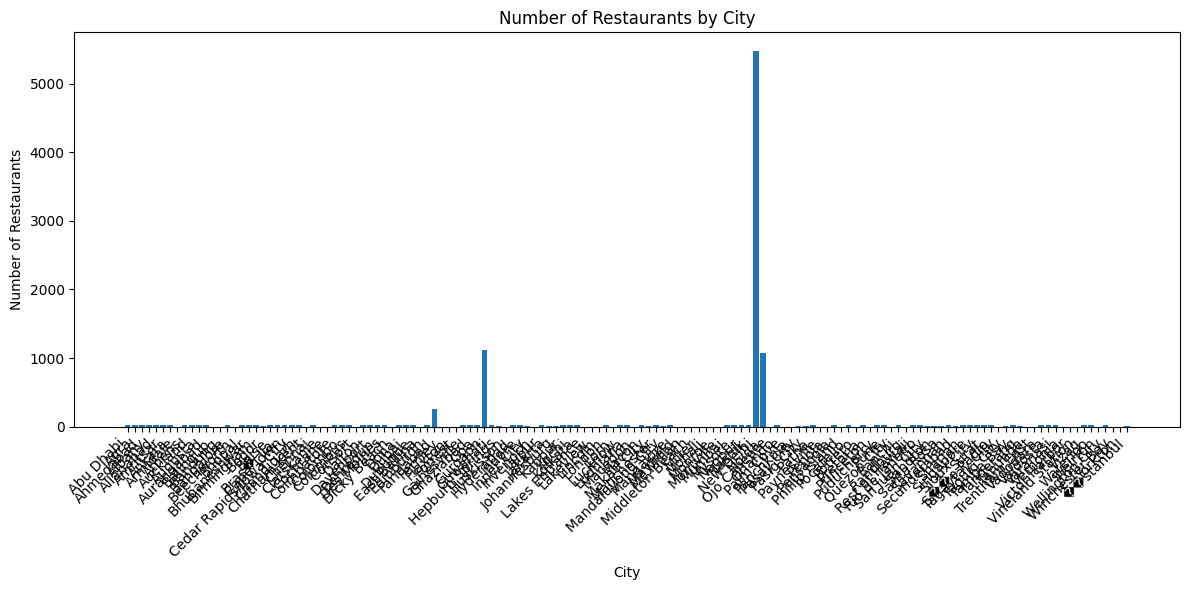

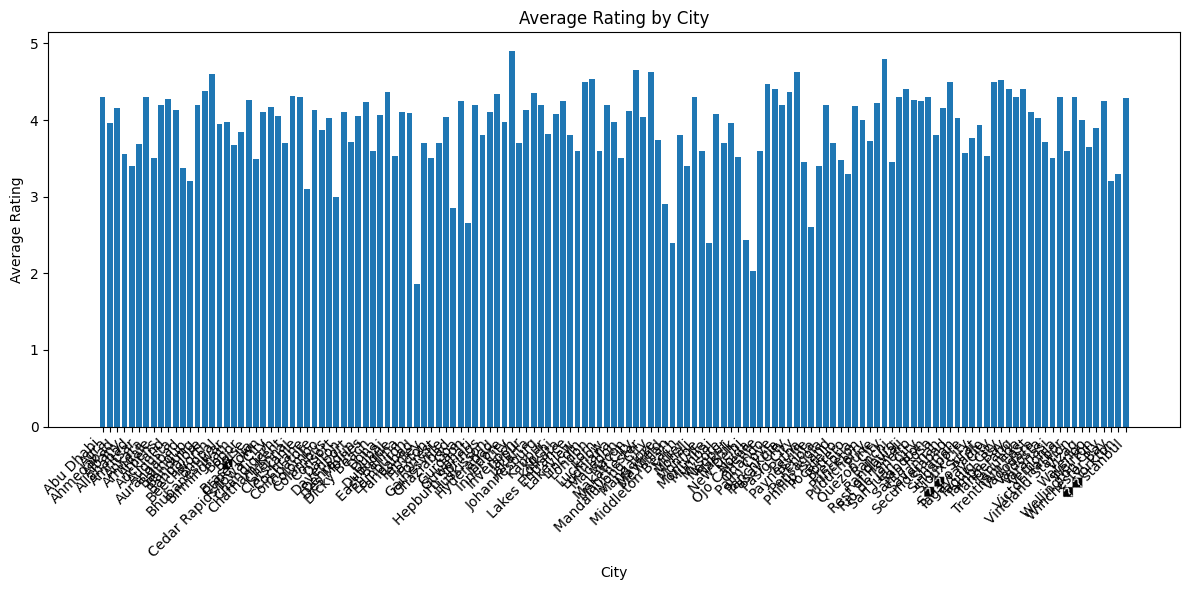

In [8]:
#Install folium for map visualization in Google Colab
!pip install folium

import pandas as pd
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/CognifyzTechnologies_ML-Internship/Dataset .csv')

print(df[['Latitude', 'Longitude']].describe())

# Step: Visualize restaurant distribution on a map
# Create a map centered at an initial location
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add marker clusters for each restaurant location
marker_cluster = MarkerCluster().add_to(m)
for _, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(marker_cluster)

# Save the map to an HTML file
m.save('/content/drive/MyDrive/CognifyzTechnologies_ML-Internship/restaurant_map.html')

# Step: Group restaurants by city or locality and analyze concentration
city_group = df.groupby('City').size().reset_index(name='RestaurantCount')
print(city_group)

city_stats = df.groupby('City').agg({'Aggregate rating': 'mean', 'Cuisines': 'count', 'Price range': 'mean'})
print(city_stats)

plt.figure(figsize=(12, 6))
plt.bar(city_group['City'], city_group['RestaurantCount'])
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants by City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step: Identify interesting insights or patterns
# Example: Plot average ratings by city
plt.figure(figsize=(12, 6))
plt.bar(city_stats.index, city_stats['Aggregate rating'])
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Average Rating by City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
